In [1]:
from main import main

Base directory: /Volumes/diedrichsen_data$/data/SensoriMotorPrediction/


The force difference cue is 75% and 25% in the 200-400ms window after perturbation fades across sessions.

session:behav, stimFinger:index, forceDiff=1.53
session:behav, stimFinger:ring, forceDiff=-1.75
session:scanning, stimFinger:index, forceDiff=-0.02
session:scanning, stimFinger:ring, forceDiff=-0.28
session:training, stimFinger:index, forceDiff=0.43
session:training, stimFinger:ring, forceDiff=-0.52


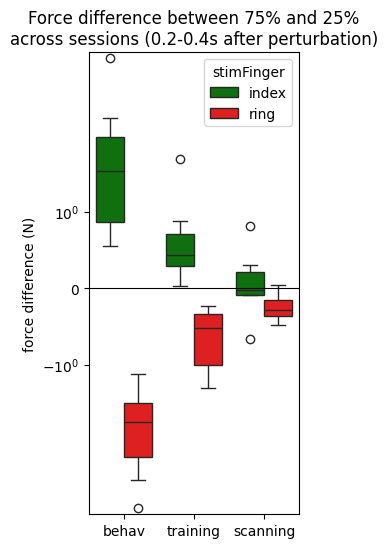

In [2]:
main("plot:75-25")